# Task is to predict the input of Turbine 9 for Blast Furnace B. Here the signal for Blast Furnace B is DEWIHOBT9_I0 and it will work while the value of it's will be 100. If the value is zero then Blast Furnace A is working that means the value of the signal stands for Blast furnace A (DEWIHOAT9_I0) will be 100

# Importing library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# Load CSV file
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)

test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime)# here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [14]:
test_new = test_new.assign(RWDAKRWRS8V0 = test_new.AEDATZ_HO_V0 - (test_new.AEDAHO_T8_V2 + test_new.AEDAHO_T9_V2))

In [8]:
# print(test_new.index)

In [15]:
multivariate_column_label=['RWDAKRWRS8V0','DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
                        'AEWIHO_T9AV2','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
univariate_column_label=['AEDAHO_T9_V2']
# mul=test_new.iloc[500:1000][multivariate_column_label] #just for checking whether it is working or not
# print(mul.head())

In [16]:
# # lab_1=['DEWIHOAT9_I0','DEWIHOBT9_I0']
# check_A= test_new.iloc[500:245000]['DEWIHOAT8_I0']
# check_A.head()
# print(check_A.size)

In [17]:
# # val_A = check_A.loc[check_A['DEWIHOAT8_I0']==0]
# # val_A.size
# check_A.plot()
# plt.show()

In [18]:
size_column = len(multivariate_column_label)
print(size_column)

7


In [19]:
# multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
#                                           'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
# multivariate_data = multivariate_data.set_index('dateTime')

multivariate_data=test_new.iloc[500:18000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

# univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
# univariate_data = univariate_data.set_index('dateTime')
univariate_data=test_new.iloc[500:24999][univariate_column_label]
univariate_data=univariate_data.loc[::-1]

In [20]:
multivariate_data

,RWDAKRWRS8V0,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,,
2019-03-21 23:21:00,-33.622323,100.0,41.361023,97.068136,97.762204,77.228514,73.880073
2019-03-21 23:22:00,-33.408415,100.0,41.029029,97.044139,97.784631,76.970870,73.332486
2019-03-21 23:23:00,-33.203275,100.0,40.848848,97.052145,97.734956,77.603184,72.955013
2019-03-21 23:24:00,-33.206749,100.0,40.879590,96.932183,97.711727,77.513527,72.977738
2019-03-21 23:25:00,-33.304350,100.0,40.980816,96.955369,97.722945,77.091041,73.189071
2019-03-21 23:26:00,-33.429515,100.0,40.947055,96.926579,97.694895,77.030955,73.268801
2019-03-21 23:27:00,-33.502724,100.0,41.124218,96.778629,97.595544,77.279791,73.540479
2019-03-21 23:28:00,-33.252621,100.0,41.159163,96.720249,97.549077,77.507235,73.304496
2019-03-21 23:29:00,-33.432603,100.0,41.183860,96.738641,97.568306,77.478294,73.515701


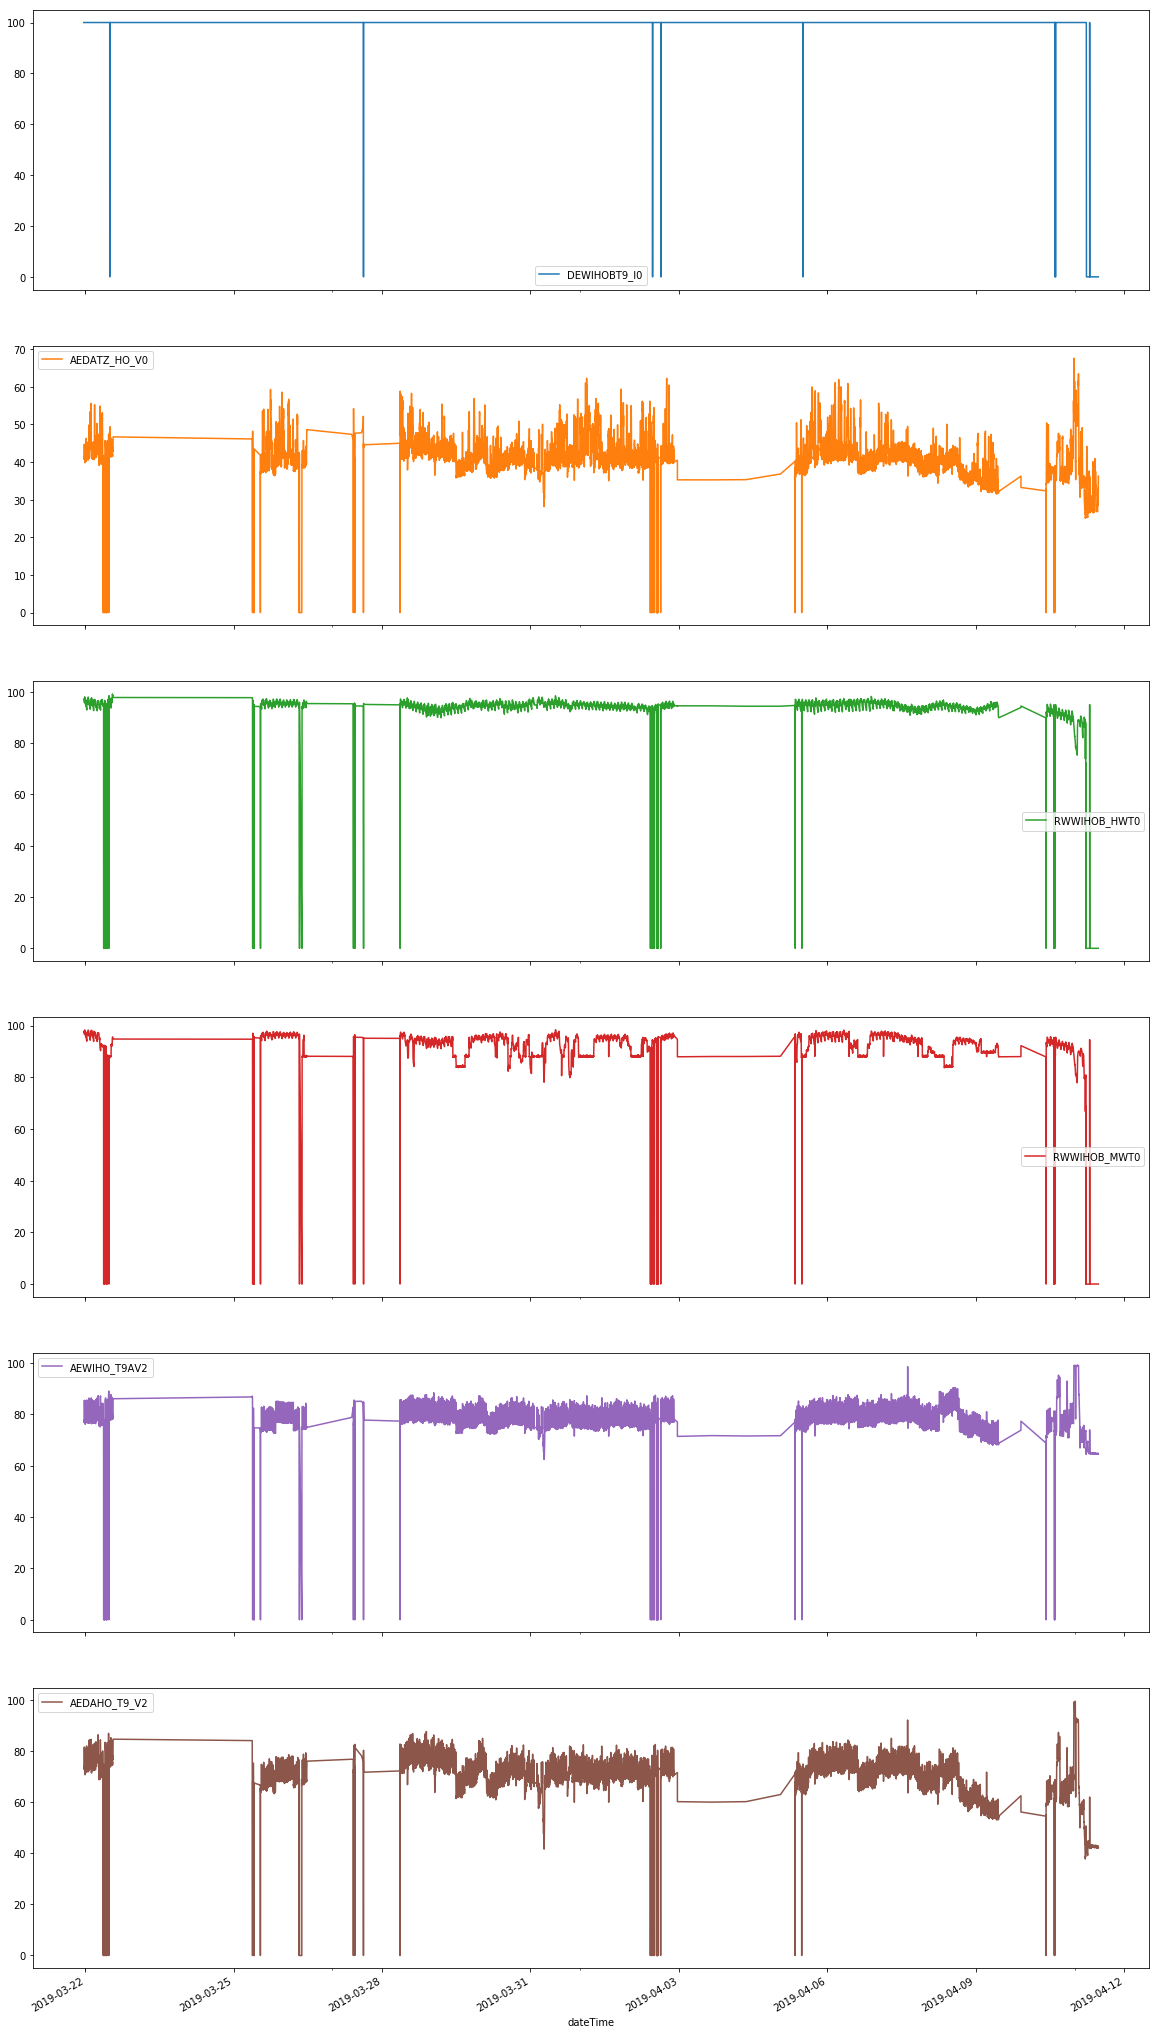

In [132]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

# plt.show()
# ax[0]
# for axe in ax[0]:
#     axe.plot()
#     plt.rcParams['figure.figsize'] =(40,10)
#     plt.show()

In [133]:
# multivariate_data.plot()
# plt.rcParams['figure.figsize'] =(20,10)
# plt.show()

In [134]:
# a=multivariate_data.loc[multivariate_data['AEDAHO_T9_V2']==0]
# a.size

In [135]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','AEWIHOBKZ_V0','RWWIHOB_MWT0',
#                         'AEWIHO_T9AV2','AEDAHO_T9_V2']

zero_index=[]
zero_index=np.array(zero_index)
print(type(drop_index))
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

<class 'numpy.ndarray'>
size of zero_index:  359


In [136]:
multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated

In [137]:
print(multivariate_data.shape)
multivariate_data_modify.shape

(17500, 6)


(17139, 6)

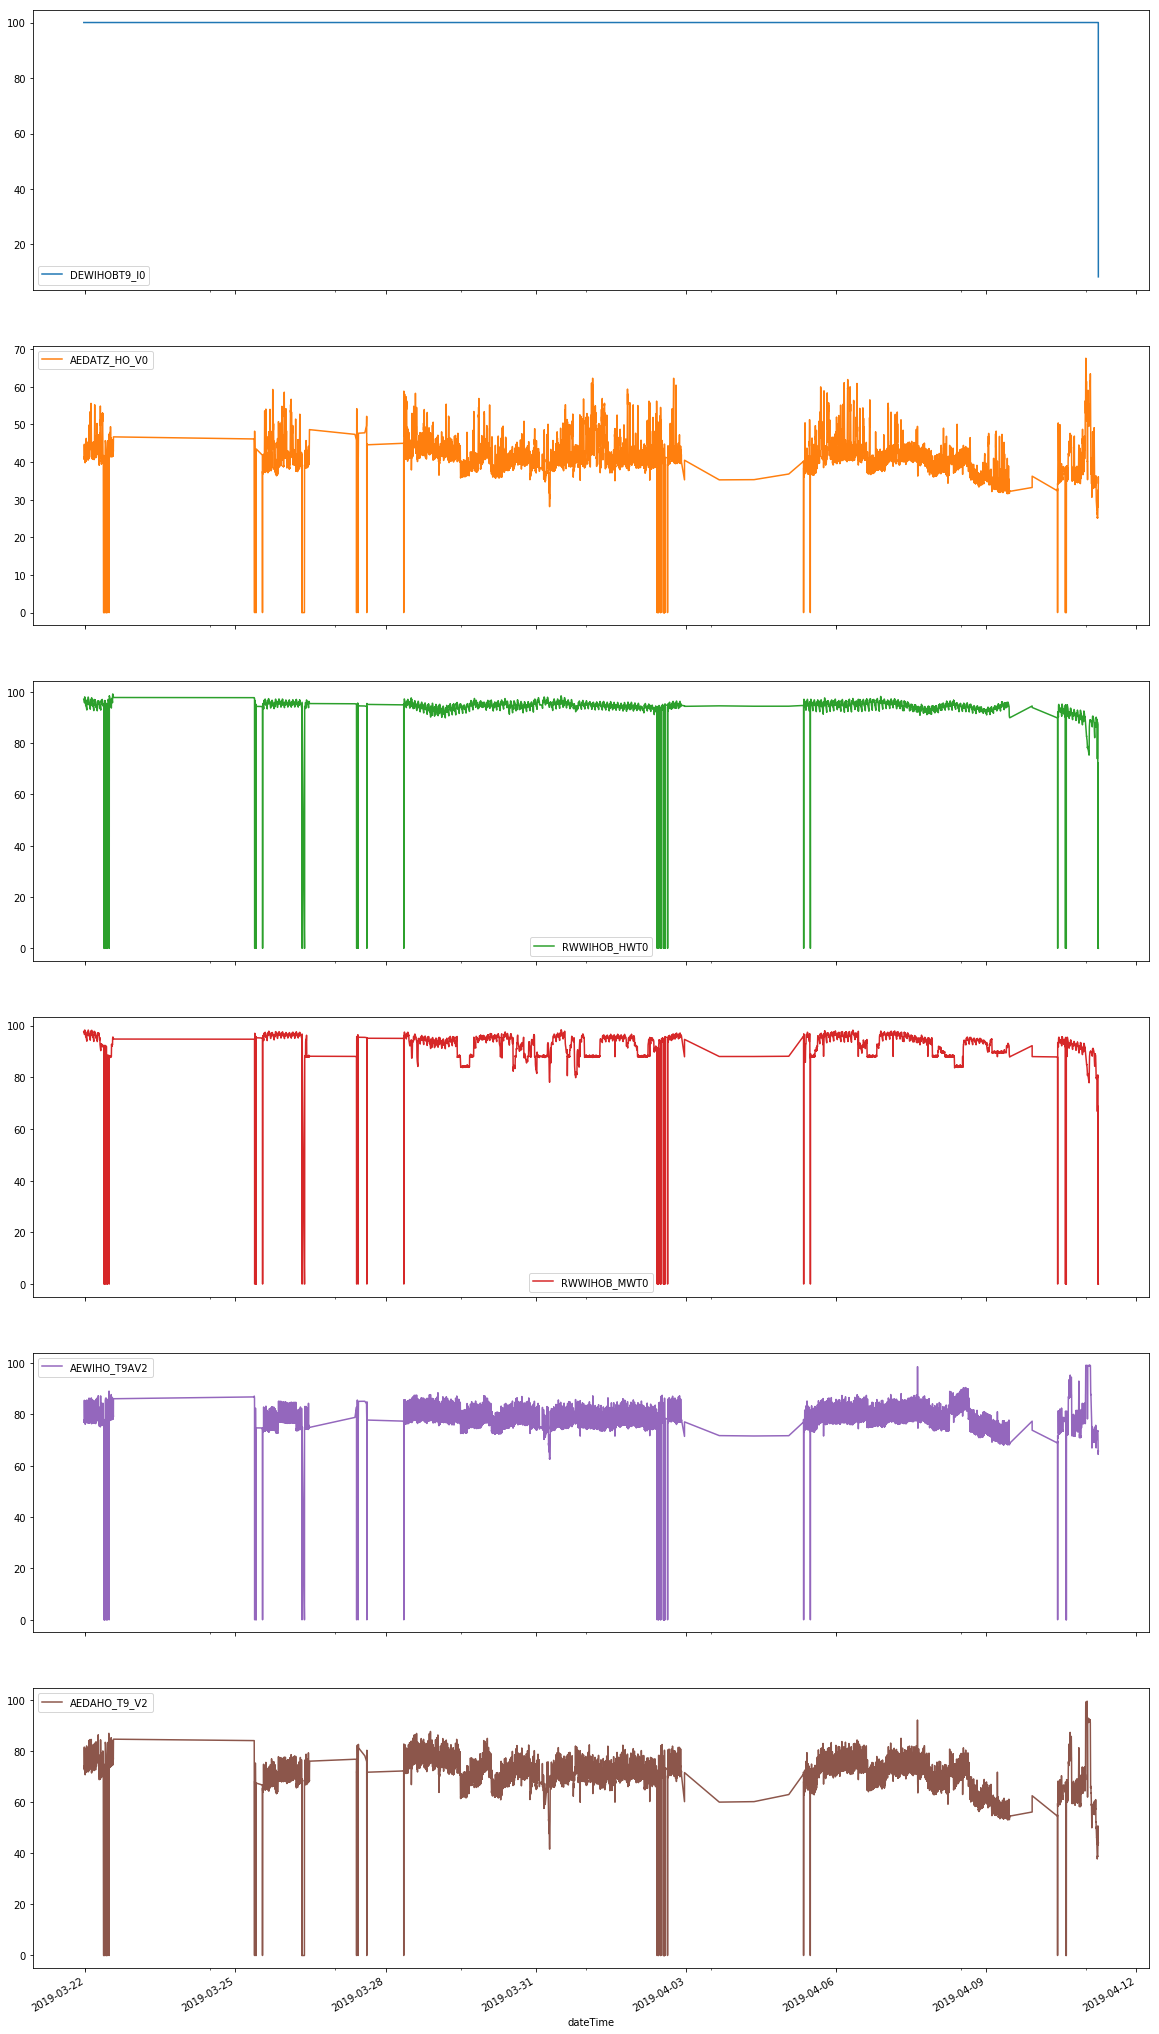

In [138]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

In [139]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','AEWIHOBKZ_V0','RWWIHOB_MWT0',
#                         'AEWIHO_T9AV2','AEDAHO_T9_V2']

zero_index_1=[]
zero_index_1=np.array(zero_index_1)
for index, value in multivariate_data_modify.iterrows():
    for i , v in enumerate(value):
        if i == 3  and v == 0.0:
#             print('index: ',index)
            zero_index_1=np.append(zero_index_1,index)

print('size of zero_index: ',zero_index_1.size)

size of zero_index:  124


# dropping zero from multivariate dataset

In [13]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from univariate dataset

In [ ]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
null_columns_multivariate=multivariate_data.columns[multivariate_data.isnull().any()]
multivariate_data[null_columns_multivariate].isnull().sum()

In [ ]:
null_columns_univariate=univariate_data.columns[univariate_data.isnull().any()]
univariate_data[null_columns_univariate].isnull().sum()

In [ ]:
# a=[1,2,3,4]
# b=[1,2]
# c=[1,2,3,4,5,6]

# d=[a,b,c]

# maxlen=max(map(len,d))
# print(maxlen)

In [ ]:
# for i in d:
#     if len(i)<maxlen:
#         i.extend(0 for _ in range(maxlen-len(i)))

In [ ]:
# print(d)

In [ ]:
# multivariate_data.loc[multivariate_data['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
#                                           'AEWIHOAKZ_V0','AEDAHO_T9_V2']==0]

In [ ]:
univariate_data[['AEDAHO_T9_V2']].idxmin()

In [ ]:
univariate_data.describe()

In [ ]:
multivariate_data.describe()

In [ ]:
uni_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,uni_mean)
multi_mean=multivariate_data.mean()
multivariate_data_mean=multivariate_data.replace(0,multi_mean)

In [ ]:
univariate_data_mean.plot()
multivariate_data_mean.plot()
plt.show()

In [ ]:
univariate_data_mean.loc[univariate_data_mean['AEDAHO_T9_V2']==0]
# print(univariate_data)

# find max value from each column

In [ ]:
# finding max value from each column
max_val_array=[]
for idx,val in enumerate(list(test.columns)):
    x=test[val].max()
    q=[val,x]
    max_val_array.append(q)
max_val_array=np.array(max_val_array)
for i in max_val_array:
    print(i)

# find the index where the column value is zero

In [22]:
for idx,val in enumerate(list(multivariate_data.columns)):
#     print('idx: ',idx)
#     print('val',val)
    count=1
    for i, j in multivariate_data.iterrows():
#         print('i',i)
#         print('j',j)
        for k in j:
#             print(k)
            if k==0:
                count+=1
#                 print(count,'\t\t','\t\t',k)
    print(idx,'\t\t',count)


0 		 20006
1 		 20006
2 		 20006
3 		 20006
4 		 20006
5 		 20006
6 		 20006


In [18]:
for idx, val in enumerate(list(multivariate_data.columns)):
    print('-------------------------------------val:------------------------------------- ',val)
    count=0
    print('\nnow count: ',count)
    x=multivariate_data[val]
    print(val)
    for a in x:
        if a==0:
            count+=1
#             print('count here: ',count)
            

-------------------------------------val:-------------------------------------  AEDATZ_HO_V0

now count:  0
AEDATZ_HO_V0
-------------------------------------val:-------------------------------------  AEWIHOAVABV2

now count:  0
AEWIHOAVABV2
-------------------------------------val:-------------------------------------  RWWIHOB_HWT0

now count:  0
RWWIHOB_HWT0
-------------------------------------val:-------------------------------------  AEWIHOBKZ_V0

now count:  0
AEWIHOBKZ_V0
-------------------------------------val:-------------------------------------  DEWIHOBT9_I0

now count:  0
DEWIHOBT9_I0
-------------------------------------val:-------------------------------------  AEWIHO_T9AV2

now count:  0
AEWIHO_T9AV2
-------------------------------------val:-------------------------------------  AEDAHO_T9_V2

now count:  0
AEDAHO_T9_V2


In [ ]:
print(multivariate_data.shape)
print(multivariate_data_drop_zero.shape)

In [ ]:
for x,y in multivariate_data.iterrows():
    print(y)

In [ ]:
qq=univariate_data.loc[univariate_data['AEDAHO_T9_V2']==0]
print(qq.size)

In [ ]:
print(multivariate_data.iloc[0])

In [15]:
print(multivariate_data.shape)

(24499, 7)


In [16]:
print(multivariate_data_drop_zero.shape)

(5693, 7)


In [28]:
# multivariate_data.astype(bool).sum(axis=0)

In [66]:
multivariate_data.astype(bool).sum(axis=1)

SyntaxError: invalid syntax (<ipython-input-66-e39e4217c5a9>, line 1)

# Dropping the row while I will get signal DEWIHOBT9_I0 is == 0

In [32]:
print(multivariate_data.shape)

(24499, 7)


In [45]:
drop_index=[]
drop_index=np.array(drop_index)
print(type(drop_index))
for index, value in multivariate_data.iterrows():
#     print('value: ',value)
    for i , v in enumerate(value):
#         print('i: ',i)
#         print('v: ',v)
        if i == 3 and v == 0.0:
#             print('value: ',value)
#             print('index: ',index)
            drop_index=np.append(drop_index,index)

# print('drop_index: ',drop_index)

<class 'numpy.ndarray'>


In [46]:
modify_frame = multivariate_data.drop(drop_index,axis=0)

In [47]:
print(modify_frame.shape)

(5717, 7)


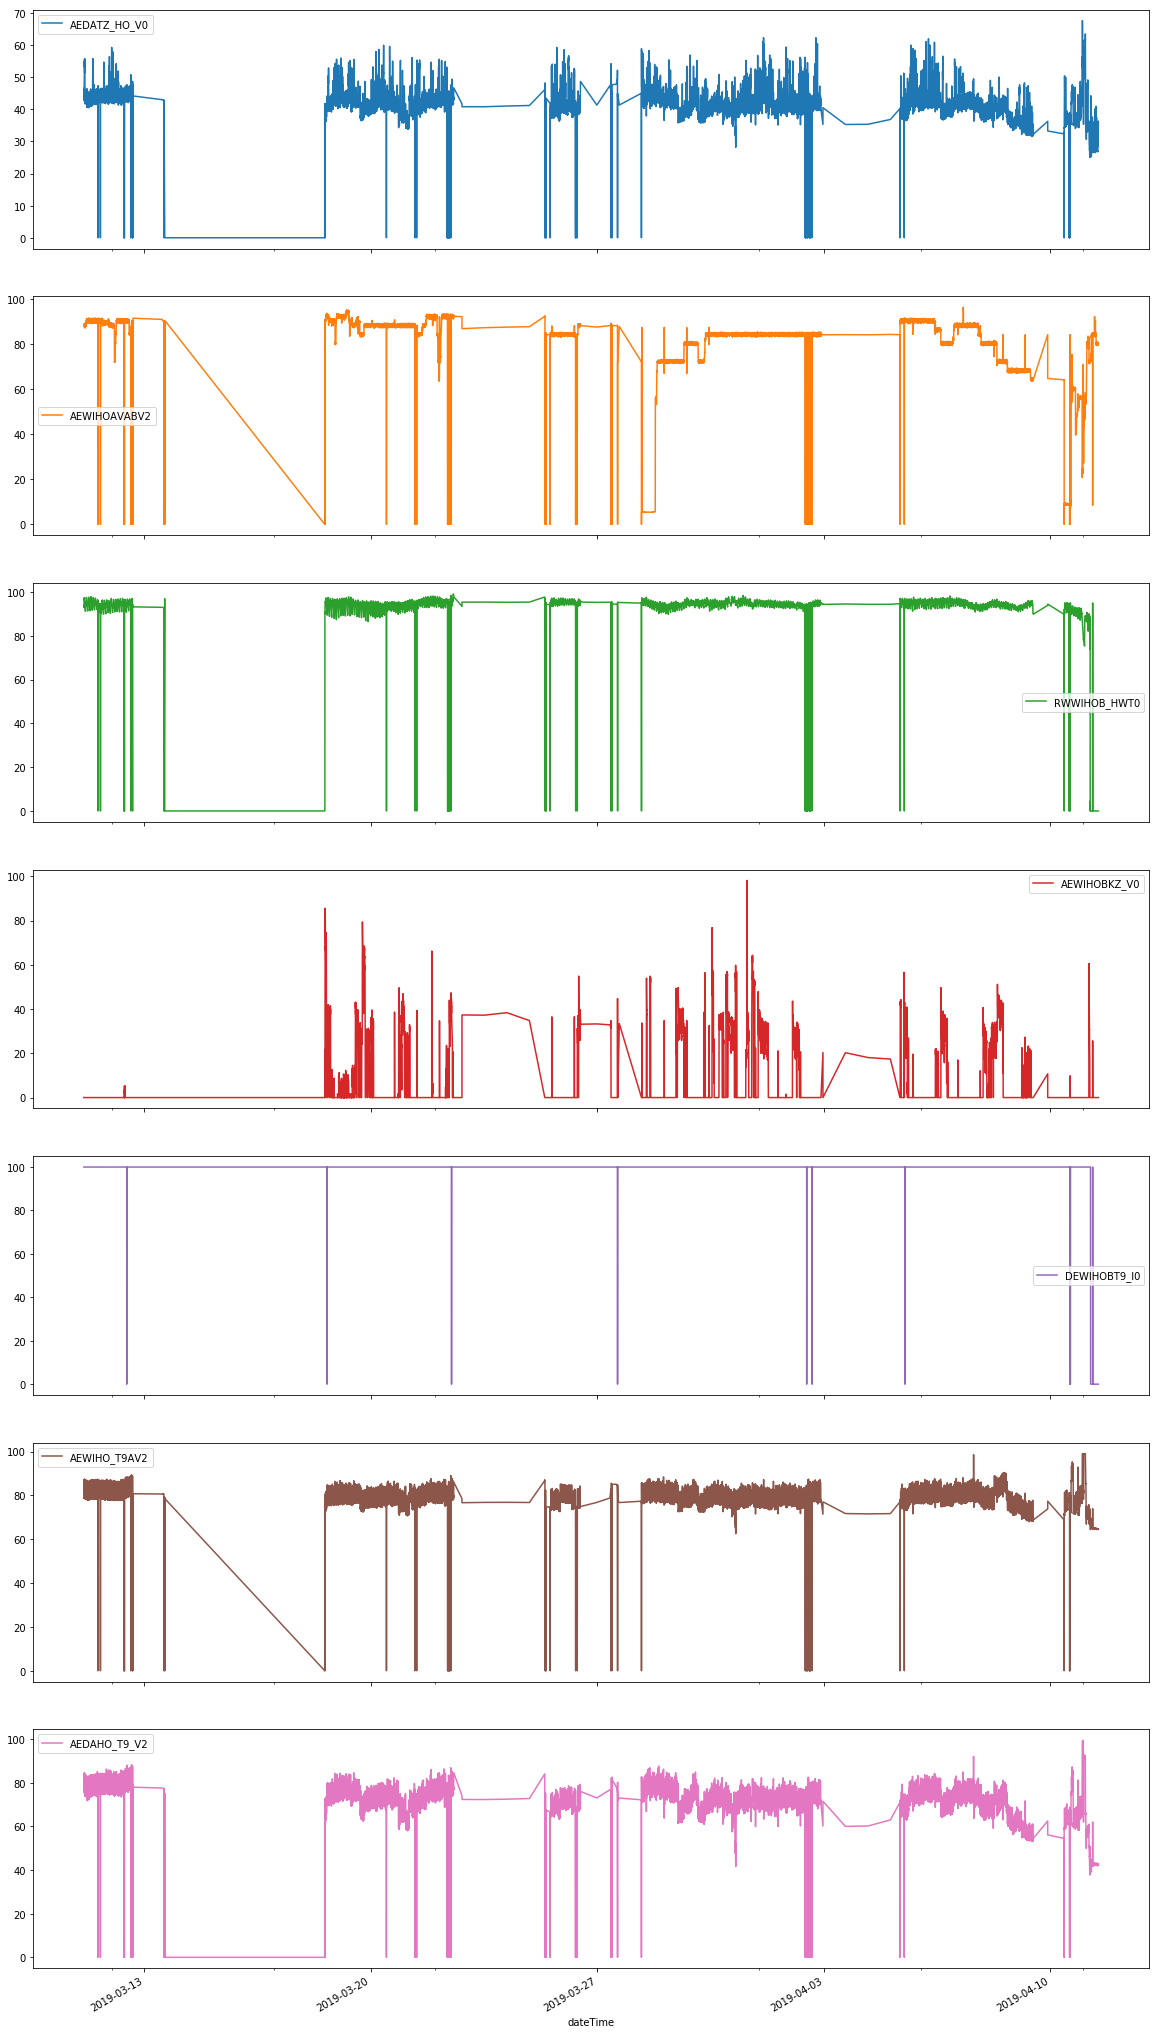

In [48]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

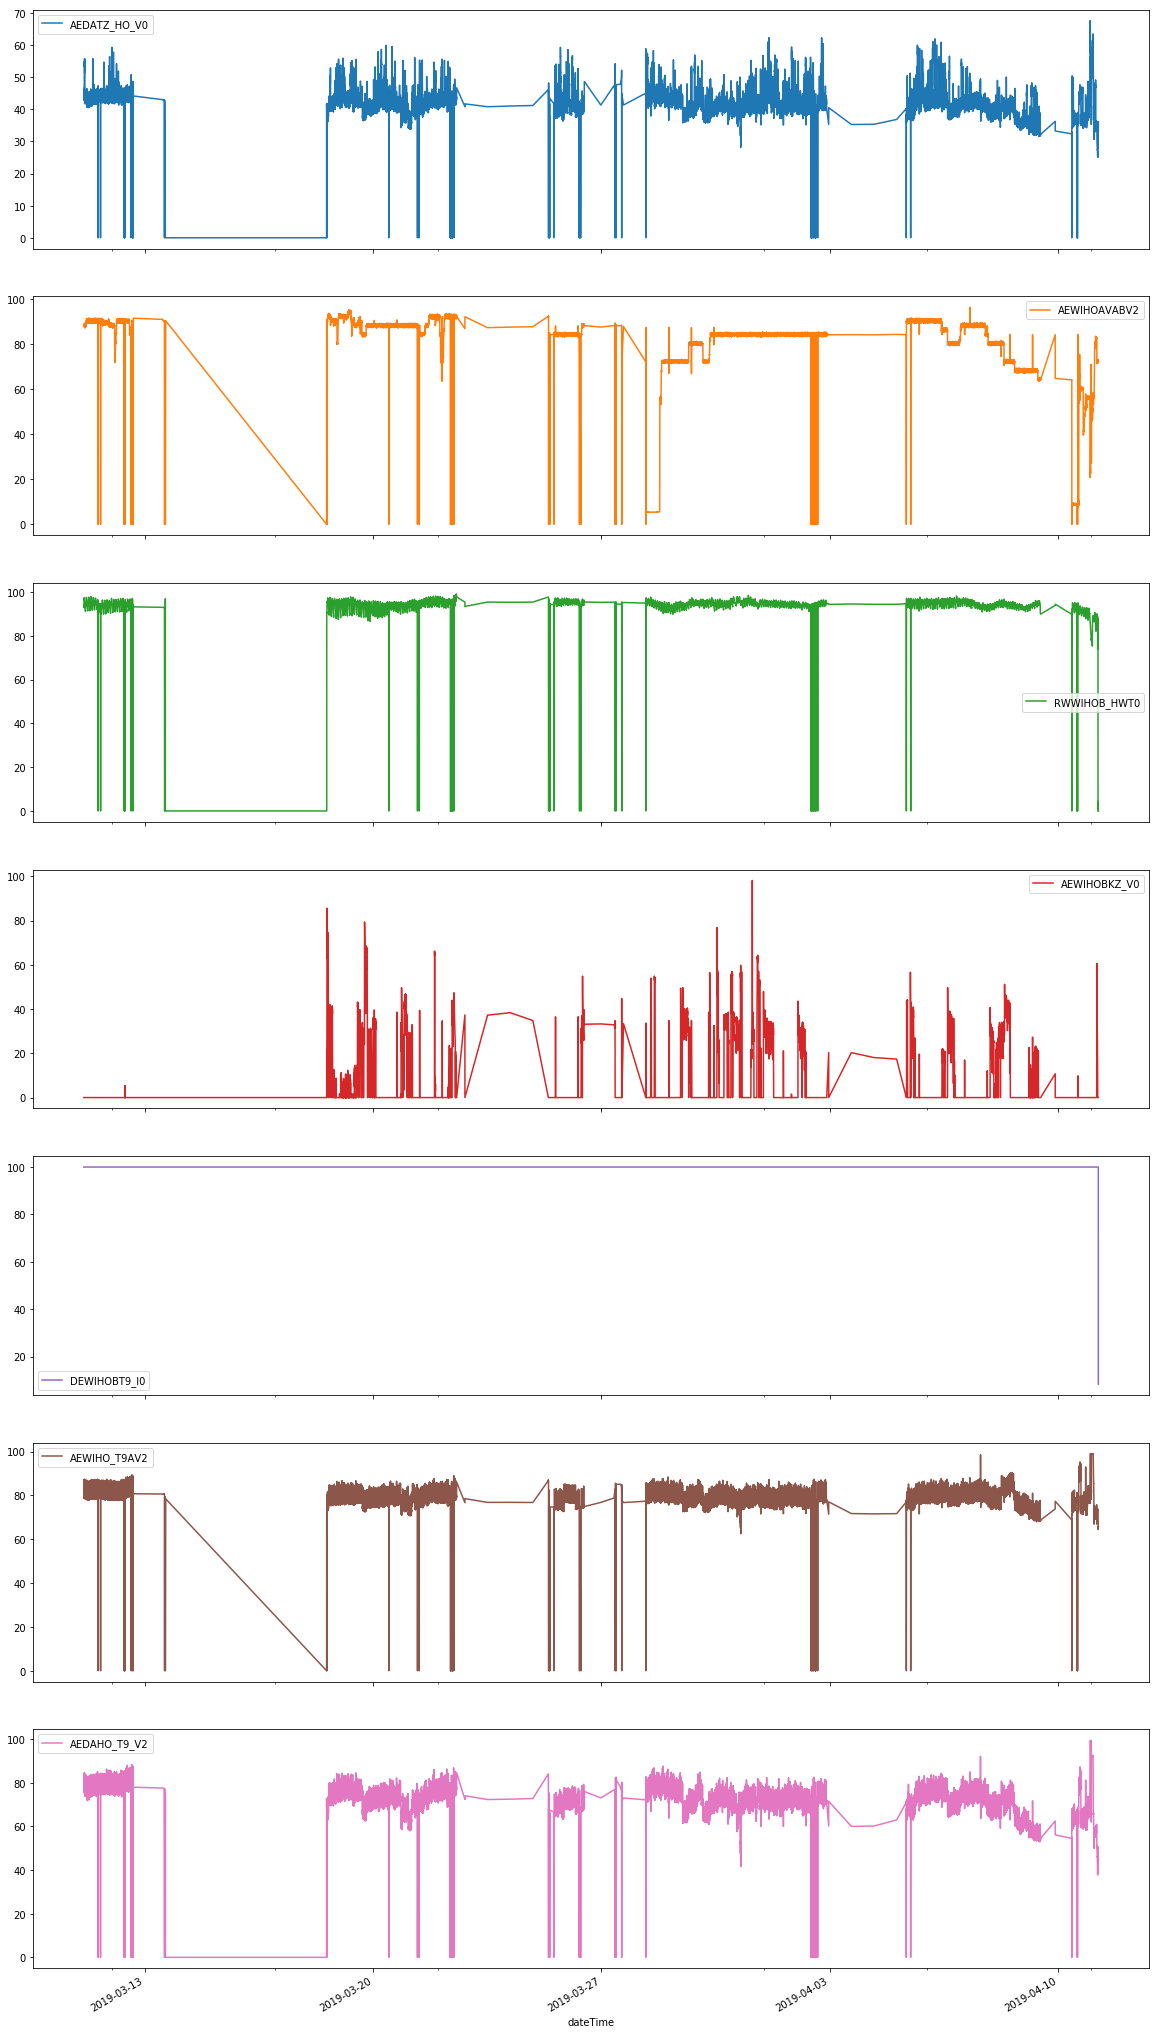

In [43]:
ax = modify_frame.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()